In [1]:
pip install pandas geopandas matplotlib shapely


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\jiang\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point



In [102]:
# Read CSV files
csv_file = 'data.csv'  
df = pd.read_csv(csv_file)



C:\Users\jiang\AppData\Local\Temp\ipykernel_36292\3227642555.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [103]:
# Creat a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
incidents_gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")



In [104]:
incidents_gdf.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC',
       'PARKS_NM', 'PD_CD', 'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon', 'geometry'],
      dtype='object')

In [105]:
incidents_gdf.Longitude.value_counts().sort_index(ascending=True)

Longitude
-74.254555     1
-74.253178     1
-74.252711     1
-74.252487     1
-74.251844     1
              ..
-73.700984     1
-73.700955     1
-73.700717    12
-73.700286     1
 0.000000      2
Name: count, Length: 53704, dtype: int64

In [106]:
incidents_gdf.Longitude.value_counts().sort_index(ascending=True).loc[lambda x: x != 0.000000].sort_values(ascending=False)

Longitude
-73.989280    936
-73.776234    697
-73.871197    526
-73.869986    521
-73.875932    501
             ... 
-73.918045      1
-73.918046      1
-73.918070      1
-73.918076      1
-73.914750      1
Name: count, Length: 53704, dtype: int64

In [107]:
incidents_gdf.Latitude.value_counts().sort_index(ascending=True)

Latitude
0.000000     2
40.499315    1
40.499393    1
40.500207    1
40.500382    1
            ..
40.911087    4
40.911236    2
40.911299    4
40.912346    1
40.912714    2
Name: count, Length: 53500, dtype: int64

In [108]:
incidents_gdf.Latitude.value_counts().sort_index(ascending=True).loc[lambda x: x != 0.000000].sort_values(ascending=False)

Latitude
40.750423    932
40.679981    697
40.733729    526
40.650466    524
40.756568    501
            ... 
40.678559      1
40.678574      1
40.761937      1
40.678585      1
40.785038      1
Name: count, Length: 53500, dtype: int64

In [109]:
incidents_gdf.Lat_Lon.value_counts().sort_values(ascending=False)

Lat_Lon
(40.750423, -73.98928)                     932
(40.6799807384666, -73.7762339071953)      697
(40.733729, -73.871197)                    526
(40.650466, -73.869986)                    521
(40.7565675846374, -73.8759315341335)      501
                                          ... 
(40.76615940053346, -73.82090245171436)      1
(40.700469, -73.82848)                       1
(40.593423, -73.762584)                      1
(40.75993, -73.889004)                       1
(40.731658, -73.718494)                      1
Name: count, Length: 56159, dtype: int64

In [125]:
incidents_gdf.BORO_NM

0             MANHATTAN
1         STATEN ISLAND
2             MANHATTAN
3         STATEN ISLAND
4         STATEN ISLAND
              ...      
282064           QUEENS
282065           QUEENS
282066           QUEENS
282067           QUEENS
282068           QUEENS
Name: BORO_NM, Length: 282069, dtype: object

Text(0.5, 1.0, 'Number of Crime Incidents in each Borough')

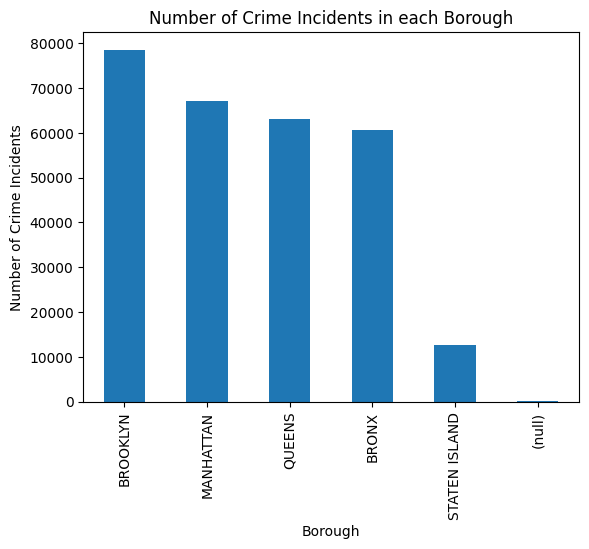

In [118]:
incidents_gdf.groupby("BORO_NM").size().sort_values(ascending=False).plot.bar()
plt.xlabel('Borough')  
plt.ylabel('Number of Crime Incidents')  
plt.title("Number of Crime Incidents in each Borough")

In [15]:
filtered_df = df[(df['Latitude'] != 0.00000) & (df['Longitude'] != 0.00000)]

# Save filtered data back to CSV file
filtered_df.to_csv('data_filtered.csv', index=False)

In [27]:
filtered_df.Latitude.value_counts().sort_index(ascending=True)

Lat_Lon
(40.499315, -74.239739)    1
(40.499393, -74.242174)    1
(40.500207, -74.244795)    1
(40.500382, -74.243916)    1
(40.500728, -74.242158)    2
                          ..
(40.911087, -73.90198)     4
(40.911236, -73.897329)    2
(40.911299, -73.902901)    4
(40.912346, -73.902131)    1
(40.912714, -73.902522)    2
Name: count, Length: 56158, dtype: int64

In [28]:
incidents_gdf.Lat_Lon.value_counts().sort_index(ascending=True)

Lat_Lon
(0.0, 0.0)                 2
(40.499315, -74.239739)    1
(40.499393, -74.242174)    1
(40.500207, -74.244795)    1
(40.500382, -74.243916)    1
                          ..
(40.911087, -73.90198)     4
(40.911236, -73.897329)    2
(40.911299, -73.902901)    4
(40.912346, -73.902131)    1
(40.912714, -73.902522)    2
Name: count, Length: 56159, dtype: int64

In [31]:
# Filter out rows with a value of 0.000000 in the Latitude and Longitude columns

filtered_gdf = incidents_gdf[(incidents_gdf['Latitude'] != 0.000000) & (incidents_gdf['Longitude'] != 0.000000)]


Text(0.5, 1.0, 'Location of Crime Incidents in New York City')

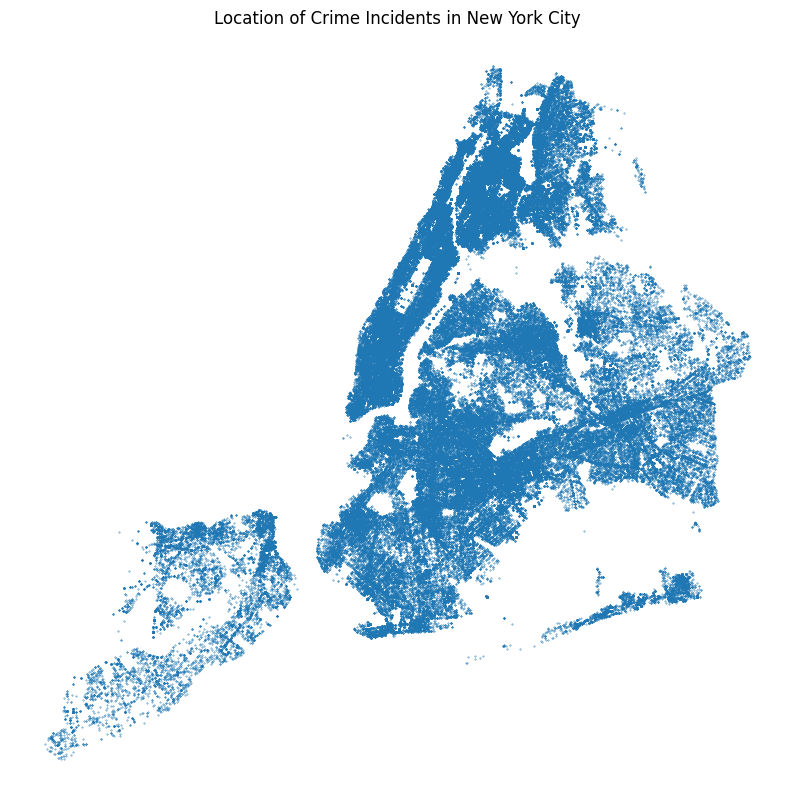

In [36]:
# Create plots, set graph size and hide axes

ax = filtered_gdf.plot(figsize=(10, 10), markersize=0.1)
ax.set_axis_off()
ax.set_title("Location of Crime Incidents in New York City")

In [58]:
# Read GeoJSON files
route1 = gpd.read_file('route_option_1.geojson')
route2 = gpd.read_file('route_option_2.geojson')
route3 = gpd.read_file('route_option_3.geojson')

In [59]:
# Ensure CRS match
route1 = route1.to_crs(filtered_gdf.crs)
route2 = route2.to_crs(filtered_gdf.crs)
route3 = route3.to_crs(filtered_gdf.crs)

In [60]:
# Spatial join to find events within each area
incidents_in_route1 = gpd.sjoin(filtered_gdf, route1, op='within')
incidents_in_route2 = gpd.sjoin(filtered_gdf, route2, op='within')
incidents_in_route3 = gpd.sjoin(filtered_gdf, route3, op='within')

C:\Users\jiang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\jiang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\jiang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Ple

In [61]:
# Count the number of events in each area
count_route1 = incidents_in_route1.shape[0]
count_route2 = incidents_in_route2.shape[0]
count_route3 = incidents_in_route3.shape[0]

In [62]:
# Print the counts
print(f"Number of events in Area 1: {count_route1}")
print(f"Number of events in Area 2: {count_route2}")
print(f"Number of events in Area 3: {count_route3}")

Number of events in Area 1: 450
Number of events in Area 2: 89
Number of events in Area 3: 259


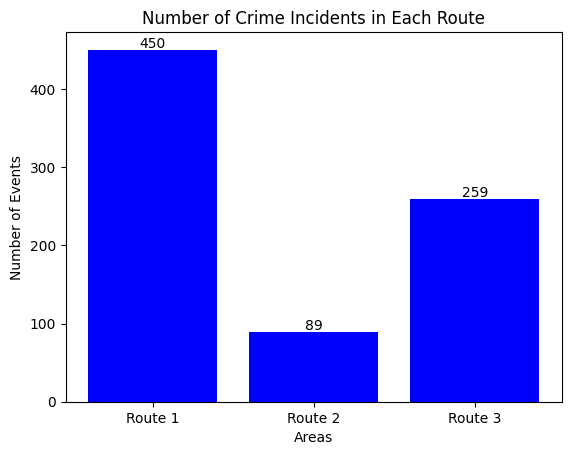

In [96]:
# Create a bar chart
import matplotlib.pyplot as plt

counts = [count_route1, count_route2, count_route3]
areas = ['Route 1', 'Route 2', 'Route 3']

# Add labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 3, str(count), ha='center') # count+3: space between bar and number 

plt.bar(areas, counts, color='blue')
plt.xlabel('Areas')
plt.ylabel('Number of Events')
plt.title('Number of Crime Incidents in Each Route')
plt.show()

<Axes: >

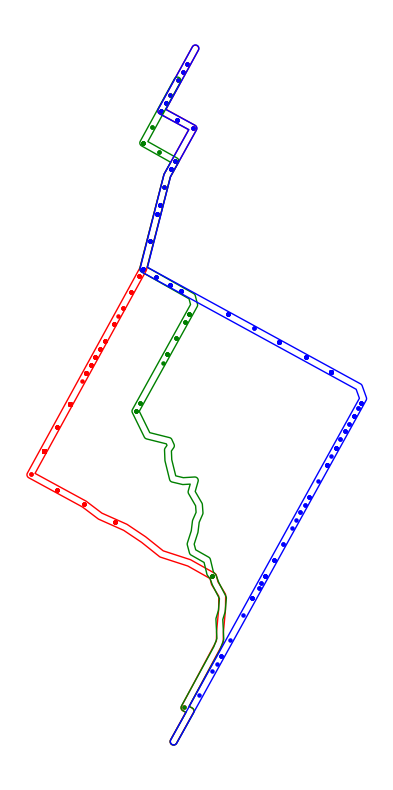

In [66]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the outlines of the areas
route1.boundary.plot(ax=ax, edgecolor='red', linewidth=1, label='Route 1').set_axis_off()
route2.boundary.plot(ax=ax, edgecolor='green', linewidth=1, label='Route 2').set_axis_off()
route3.boundary.plot(ax=ax, edgecolor='blue', linewidth=1, label='Route 3').set_axis_off()

# Plot the events within each area
incidents_in_route1.plot(ax=ax, marker='o', color='red', markersize=5, label='Crime Incidents in Route 1')
incidents_in_route2.plot(ax=ax, marker='o', color='green', markersize=5, label='Crime Incidents in Route 2')
incidents_in_route3.plot(ax=ax, marker='o', color='blue', markersize=5, label='Crime Incidents in Route 3')

Text(0.95, 0.05, 'Number of incidents: 450')

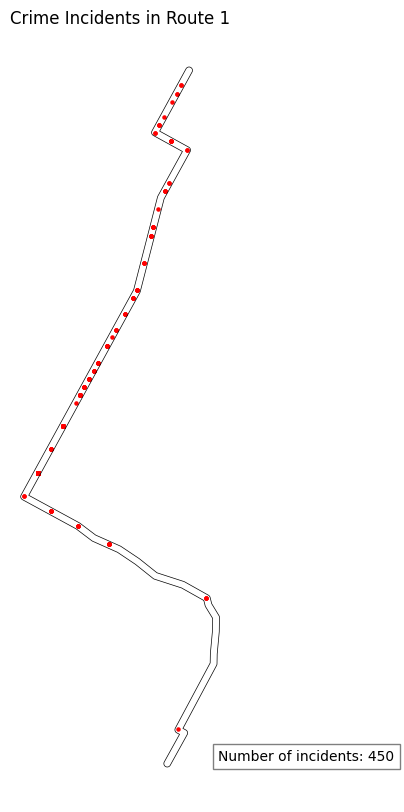

In [89]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
route1.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5, label='Route 1').set_axis_off()
incidents_in_route1.plot(ax=ax, marker='o', color='red', markersize=5, label='Crime Incidents in Route 1')
ax.set_title("Crime Incidents in Route 1")
ax.text(0.95, 0.05, f'Number of incidents: {count_route1}', transform=ax.transAxes,
        fontsize=10, verticalalignment='bottom', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))


Text(0.95, 0.05, 'Number of incidents: 89')

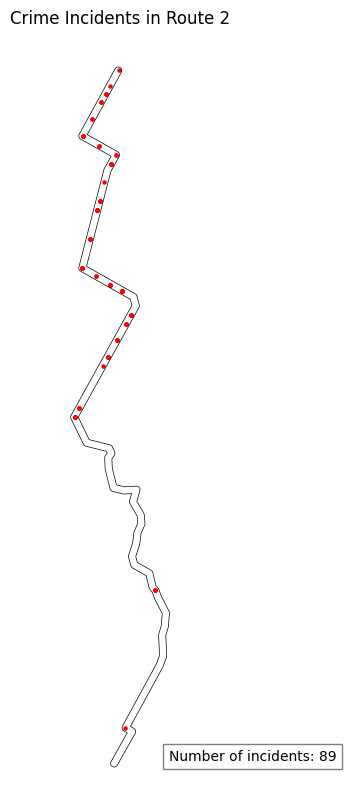

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))
route2.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5, label='Route 2').set_axis_off()
incidents_in_route2.plot(ax=ax, marker='o', color='red', markersize=5, label='Crime Incidents in Route 2')
ax.set_title("Crime Incidents in Route 2")
ax.text(0.95, 0.05, f'Number of incidents: {count_route2}', transform=ax.transAxes,
        fontsize=10, verticalalignment='bottom', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))

Text(0.95, 0.05, 'Number of incidents: 259')

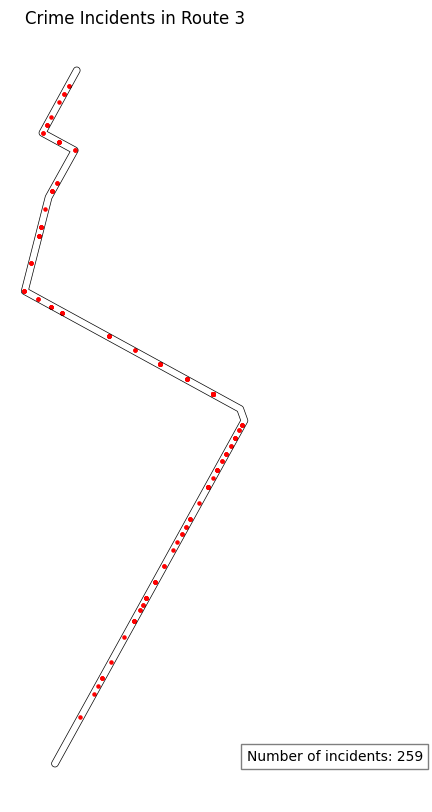

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
route3.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5, label='Route 3').set_axis_off()
incidents_in_route3.plot(ax=ax, marker='o', color='red', markersize=5, label='Crime Incidents in Route 3')
ax.set_title("Crime Incidents in Route 3")
ax.text(0.95, 0.05, f'Number of incidents: {count_route3}', transform=ax.transAxes,
        fontsize=10, verticalalignment='bottom', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))